In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\korchagin.ivan\\OneDrive - ООО М5\\Рабочий стол\\Fortune_1000.csv')
df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             998 non-null    float64
 5   num. of employees  1000 non-null   int64  
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           500 non-null    object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                992 non-null    object 
 15  Website            1000 non-null   object 
 16  Ticker             938 no

Предобработка данных

In [4]:
#Удаляю сьолюцы, которыми не буду пользоваться
df = df.drop(['newcomer', 'CEO', 'Website', 'Ticker', 'prev_rank'], axis=1)

# Меняю названия на более удобные 
df.rename(columns={ df.columns[5]: "num_of_employees" }, inplace = True)
df.rename(columns={ df.columns[-1]: "market_cap" }, inplace = True)

# Изменяю символы, использующиеся в таблице для обозначения недостатка данных на NaN
df['market_cap'] = df['market_cap'].replace('-', np.NaN).astype(np.float)

График №1

In [5]:
# Сколько женьщин руководит компанияими из Fortune 1000?
woman = df[['company', 'ceo_woman']]
woman = woman.groupby('ceo_woman').count()
woman

,company
ceo_woman,
no,932
yes,68


<AxesSubplot:title={'center':'Gender Injustice Graph'}, xlabel='Is CEO is a woman?', ylabel='Count'>

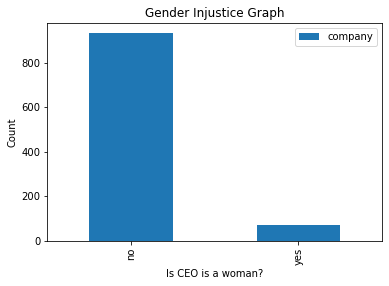

In [39]:
woman.plot(kind = 'bar',
           title = 'Gender Injustice Graph',
           xlabel = 'Is CEO is a woman?',
           ylabel = 'Count')
# Вывод: В крупнейших компаниях Америки, CEO, в подавляющем большинстве, мужчины.

График №2

In [7]:
# Посмотрим выручку и прибыль в разрезе отраслей
sectors = df[['sector', 'revenue', 'profit']].groupby('sector').sum().sort_values('revenue', ascending = False)
sectors

,revenue,profit
sector,,
Financials,2748932.9,415521.9
Health Care,2181964.6,154249.4
Retailing,1885783.3,69281.5
Energy,1745779.1,80168.9
Technology,1677257.4,273189.9
"Food, Beverages & Tobacco",553072.9,46150.1
Telecommunications,533713.0,35432.4
Industrials,514162.2,33671.7
Transportation,503125.7,36221.0


<AxesSubplot:title={'center':'Sectors by Revenue and Profit'}, xlabel='Sectors', ylabel='Revenue & Profit'>

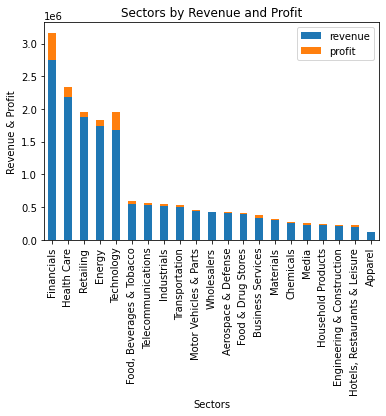

In [8]:
sectors.plot(kind='bar',
            title='Sectors by Revenue and Profit',
            xlabel = 'Sectors',
            ylabel = 'Revenue & Profit',
            stacked =True)

# Выводы: В Fortune 1000 отасли с наибольшей выручкой и прибылью: Финансовый сектор, Здравоохранение, Ритейл, энергетика и Технологический сектор.

График №3

<AxesSubplot:xlabel='profit', ylabel='num_of_employees'>

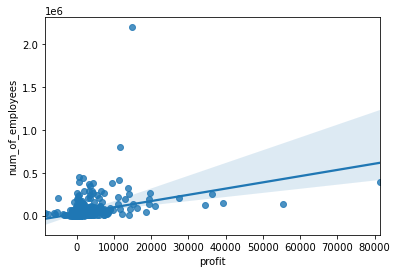

In [40]:
#Попробуем построить взаимосвязь между прибыльностью компаний и количеством сотрудников

sns.regplot(data=df, x='profit', y='num_of_employees')

# Вывод: между количеством сотрудников и прибыльностью нет прямой зависимости

График №4

In [33]:
# С помощью Heatmap посмотрим, по каким штатам и в каких отраслях сосредоточены компании с наибольшей выручкой

# Сначала отсортируем самы прибыльные штаты
top_state = df[['state', 'revenue']].groupby('state').sum().head(11).index.values
top_state

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI'],
      dtype=object)

In [36]:
#Сформируем сводную таблицу
x = df[df.state.isin(top_state)].pivot_table(
                        index='state', 
                        columns='sector', 
                        values='revenue', 
                        aggfunc=sum).fillna(0)
x

sector,Aerospace & Defense,Apparel,Business Services,Chemicals,Energy,Engineering & Construction,Financials,Food & Drug Stores,"Food, Beverages & Tobacco",Health Care,...,Household Products,Industrials,Materials,Media,Motor Vehicles & Parts,Retailing,Technology,Telecommunications,Transportation,Wholesalers
state,,,,,,,,,,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,6755.0,0.0,0.0,4605.0,...,0.0,0.0,4929.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,4194.0,0.0,0.0,0.0,42405.0,0.0,...,0.0,0.0,0.0,0.0,0.0,542408.5,0.0,5115.4,12153.6,0.0
AZ,0.0,0.0,10299.4,0.0,20936.3,8429.0,0.0,5634.8,0.0,7159.4,...,0.0,0.0,4811.6,0.0,0.0,3939.9,32638.5,0.0,4844.0,19518.6
CA,3163.6,13026.0,61333.7,0.0,191069.0,38756.9,212930.9,2559.6,4200.8,84644.0,...,13101.6,0.0,22827.1,112713.4,24578.0,46869.5,1006383.1,0.0,0.0,25911.8
CO,4933.2,13870.6,5292.1,0.0,32853.0,5829.2,0.0,0.0,10579.4,14101.5,...,0.0,0.0,13696.1,10292.0,0.0,13458.0,2098.3,15385.7,0.0,28916.8
CT,2355.7,0.0,9351.0,0.0,0.0,9174.6,55383.2,0.0,0.0,153566.0,...,16583.2,12554.4,4489.9,0.0,0.0,0.0,44792.3,53871.0,16648.0,0.0
DC,0.0,0.0,2352.7,0.0,0.0,0.0,123681.0,0.0,0.0,20521.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE,0.0,0.0,0.0,27038.0,0.0,0.0,7909.0,0.0,13846.0,2158.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,14911.6,0.0,19935.6,8906.3,56023.0,35406.6,23138.4,38462.8,0.0,3513.5,...,0.0,0.0,0.0,0.0,0.0,48646.3,33659.7,0.0,28782.9,41768.8


<AxesSubplot:xlabel='sector', ylabel='state'>

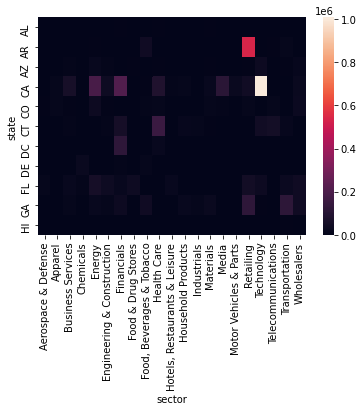

In [38]:
'''
Выводы: 
1. Штаб-квартиры компании с нибольшей выручкой сосредоточены в Калифорнии
2. Много штаб-квартир технологических компаний с большой выручкой распологаются в Калифорнии (где Силиконовая долина)
3. Много штаб-квартир компаний из сектора Ритейл распологаются в Арканзасе
'''

sns.heatmap(x)